# Using the Fourier Series and the DFT

This is a homework. Do the calculations by hand or using your calculator, but not a computer program.  I suggest you include it in your notebook, but you don't have to.  I just need to be able to look it over to make sure you figured it out okay.  Dr. Roth says you have a light homework load with only the notebooks.  This is due Friday. 
1. Find the complex Fourier series for a triangle wave with peak value $A = 10$ and frequency $1/T_0$ that starts ascending from zero at $t=-T_0/8$ and peaks at $3T_0/8$, then goes back down to zero at $7T_0/8$, and then begins a new period.  See the picture below. ![Triangle Wave](Triangle_Wave.png)  


First we find the Fourier series coefficients, $$c_n = 1/T_0 \int_{T_0} x(t) e^{-j2\pi nt/T_0} dt$$  We use the python sympy package for symbolic mathematics.

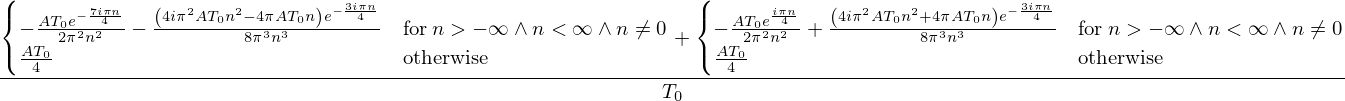

In [53]:
import sympy as sp
sp.init_printing()
t,n,T_0, A = sp.symbols(('t', 'n', 'T_0','A'))
c_n  = 1/T_0*(sp.integrate(A*(t+T_0/8)/(T_0/2)*sp.exp(-sp.I*2*sp.pi*n*t/T_0),\
                           (t,-T_0/8,3*T_0/8)) + \
           sp.integrate(-A*(t-7*T_0/8)/(T_0/2)*sp.exp(-sp.I*2*sp.pi*n*t/T_0),\
                        (t,3*T_0/8,7*T_0/8)))
c_n

In [54]:
c_0 = c_n.subs({n:0, T_0:1, A:10})
c_1 = c_n.subs({n:1, T_0:1, A:10})
c_2 = c_n.subs({n:2, T_0:1, A:10})
c_3 = c_n.subs({n:3, T_0:1, A:10})
c_4 = c_n.subs({n:4, T_0:1, A:10})
print(c_0.evalf())
print(c_1.evalf())
print(c_2.evalf())
print(c_3.evalf())
print(c_4.evalf())

5.00000000000000
-1.43289792062689 - 1.43289792062689*I
0.e-125 + 0.e-126*I
0.159210880069655 - 0.159210880069655*I
-0.e-127 + 0.e-125*I


The Fourier series is then:

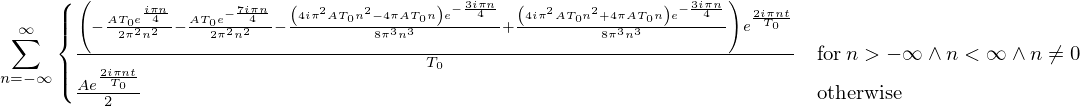

In [55]:
x = sp.Sum(c_n*sp.exp(sp.I*2*sp.pi*n*t/T_0),(n, -sp.oo, sp.oo))
x

2. Convert this to a Fourier series using only sine and cosines (real coefficients, not complex ones).  How do the $c_n$ compare to the coefficients, $a_n$ and $b_n$ in the ordinary Fourier series?

First note that $c_n = c_{-n}^*$ if $x(t) \in \mathscr R$.  Then break the Fourier series into the sums for $n < 0$, for $n = 0$, and for $n > 0$.   $$x(t) = x(t+T_0) = \sum_{n=-\infty}^{\infty}c_n e^{j2\pi nt/T_0} = c_0 + \sum_{n=-\infty}^{-1} c_n e^{j2\pi nt/T_0} + \sum_{n=1}^{\infty} c_n e^{j2\pi nt/T_0}$$  Then make the substitution $m = -n$ in the sum for negatave $n$.  Note: $c_{-m} = c_m^*$ because $x(t)$ is real. $$x(t) = x(t+T_0) = c_0 + \sum_{m=1}^{\infty}c_m^* e^{-j2\pi mt/T_0} + \sum_{n=1}^{\infty}c_n e^{j2\pi nt/T_0}$$ Then substitute $m = n$ in the sum over $m$, and combine the two sums.  Note that m is just a dummy index.  $$x(t) = c_0 + \sum_{n=1}^{\infty} \left[c_n e^{j2\pi nt/T_0} + c_n^* e^{-j2\pi nt/T_0}\right]$$  Now define $a_n \equiv 2 \mathscr {Re}[c_n]$ and $b_n \equiv -2\mathscr {Im} [c_n]$ so $c_n =  1/2(a_n - jb_n)$ into the Fourier series and use Euler's identity for the complex exponential.

$$x(t) = a_0/2 + \sum_{n=1}^{\infty} \left[1/2(a_n - jb_n)(cos(2\pi nt/T_0) + j sin(2\pi nt/T_0) + 1/2(a_n + jb_n)(cos(2\pi nt/T_0) - j sin(2\pi nt/T_0)\right]$$ $$=  a_0/2 + \sum_{n=1}^{\infty} [a_n cos(2\pi nt/T_0) +b_n sin(2\pi nt/T_0)]$$  From this we can see the $c_0$, the DC component is the same as $a_0/2$ and $a_n = \mathscr {Re}(2c_n)$ is the amplitude of the cosine components of the signal $x(t)$.  The coefficients of the sine components of $x(t)$ are $b_n = -\mathscr {Im}(2c_n)$.  Note that this shows that the real part of $c_n$ corresponds to the even part of the function $x(t)$ and the imagaginary part of $c_n$ corresponds to the odd part of $x(t)$, because cosines are even functions and sines are odd functions.

3. Sample the triangle wave starting at zero.  Make your samples $T$ seconds apart.  Take samples over exactly one period of the wave, and use $N = 8$ samples.  Write the vector of those numbers.  Call it $x(kT)$ where $k \in \{0, 1, 2, 3, 4, 5, 6, 7\}$.
4. Find the DFT of the sequence in the previous problem, and call it $X(n)$ where $n \in \{0, 1, 2, 3, 4, 5, 6, 7\}$.


[0 1 2 3 4 5 6 7]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]


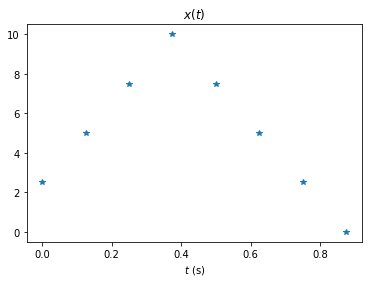

(5+0j)
(-1.5088834764831844-1.5088834764831844j)
0j


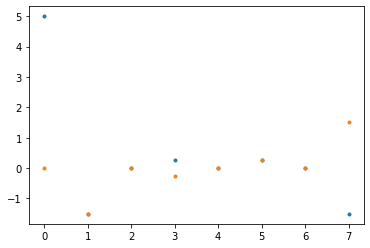

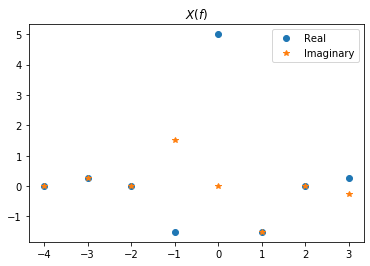

In [19]:
import numpy as np
import matplotlib.pyplot as plt
A = 10
N = 8
T_0 = 1
T = T_0/N
k = np.arange(0,N)
print(k)
t = k*T
print(t)
x = np.piecewise(t,[(t<3*T_0/8) & (t>=0), (t>=3*T_0/8) & (t<7*T_0/8), t>= (7*T_0/8)],\
                 [lambda t: 2*A/T_0*(t+T_0/8), lambda t: -2*A/T_0*(t-7/8*T_0),\
                 lambda t: 2*A/T_0*(t-7*T_0/8)])
plt.plot(t,x,"*")
plt.title('$x(t)$')
plt.xlabel('$t$ (s)')
plt.show()
X = 1/N*np.fft.fft(x)  # Notice this is 1/N * what we were asked.
print(X[0])
print(X[1])
print(X[2])
f = np.arange(-1/2/T, 1/2/T,1/T_0) # np.fft.fftfreq(N,T)
plt.plot(k, np.real(X), '.', k, np.imag(X), '.')
plt.show()

X = np.fft.fftshift(X)

plt.plot(f,np.real(X),'o',f,np.imag(X),'*')
plt.title('$X(f)$')
plt.legend(['Real', 'Imaginary'])
plt.show()

5. Approximate the formula for the complex Fourier series coefficients, $c_n$ with the DFT.  (You did this in class a while back).  Compare the numerical results You got above with this approximation?
6. When you compared the $c_n$ to the $a_n$ and $b_n$ you should have noted that negative $n$ terms paired with positive $n$ terms to make the sinusoidal waves you learned about in high school.  In previous work, you showed that if $x(t) \in \mathscr R$ then $c_{-n} = c_n^*$, and $X(-n) = X(n)^*$.  You also learned that $X(n+N) = X(n)$.  Use that to figure out from the $X(n)$ what an approximation for $c_{-1}$ is. What valid negative frequency components can you find using the DFT approximation, and what values of $n$ goes with them?
7.  What is the highest frequency component you can resolve using the eight samples you took in $T_0$ seconds using the DFT?  What would this be in general in terms of $T$?
8. The triangle wave has higher frequency components than you could resolve in the problem above.  What if the wave we sampled only contained those frequency components that we could resolve above?  To figure out how this would work, sample $sin(2\pi t/T_0)$ using eight samples over one period as you did above.  Take the DFT of that, and compare it to the complex Fourier series coefficients for this wave.  What do you notice?


In [49]:
import sympy as sp
sp.init_printing()
t,n,T_0, A = sp.symbols(('t', 'n', 'T_0','A'))
c_n  = 1/T_0*(sp.integrate(sp.sin(2*sp.pi*t/T_0)*sp.exp(-sp.I*2*sp.pi*n*t/T_0),\
                           (t, 0, T_0)))
c_n
c_1 = c_n.subs({n:1, T_0:1})
c_2 = c_n.subs({n:2, T_0:1})
print(c_1.evalf())
print(c_2.evalf())

-0.5*I
0


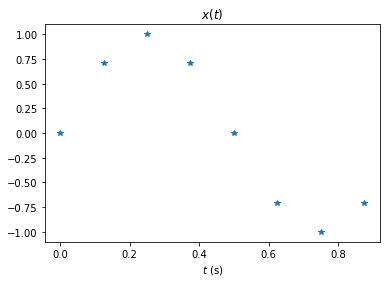

(-5.456039645643629e-17-0.5j)
(1.5308084989341915e-17-1.3877787807814457e-17j)


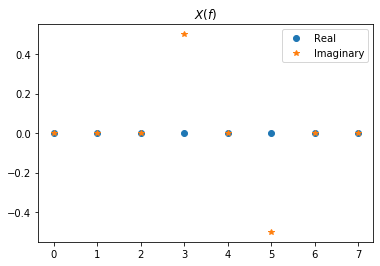

In [61]:
A = 10
N = 8
T_0 = 1
T = T_0/N
t = np.arange(0,T_0,T)
x = np.sin(2*np.pi*t/T_0)
plt.plot(t,x,"*")
plt.title('$x(t)$')
plt.xlabel('$t$ (s)')
plt.show()
X = 1/N*np.fft.fft(x)
print(X[1])
print(X[2])
X = np.fft.fftshift(X)
f = np.arange(0, 1/T,1/T_0) # np.fft.fftfreq(N,T)
plt.plot(f,np.real(X),'o',f,np.imag(X),'*')
plt.title('$X(f)$')
plt.legend(['Real', 'Imaginary'])
plt.show()

Note that this is exact to within machine precision!  This isn't a proof, but it appears the inaccuracies on the triangle wave are caused by aliasing, not the rectangular integration.

9. Find the output voltage due to the input of the triange wave above in the circuit below.  First do this analytically, in terms of R and C, then with the DFT, and use $T_0 = 1$ second and use the values for R and C. ![Low Pass Filter](Low_Pass.png)